In [1]:
#importing all the dependencies
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import cv2
from PIL import Image
import tensorflow as tf 
tf.random.set_seed(3)
from tensorflow import keras 
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [2]:
#Loading the mnist data
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()
#shape of the numpy arary
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)


(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [3]:
print(X_train[10].shape)

(28, 28)


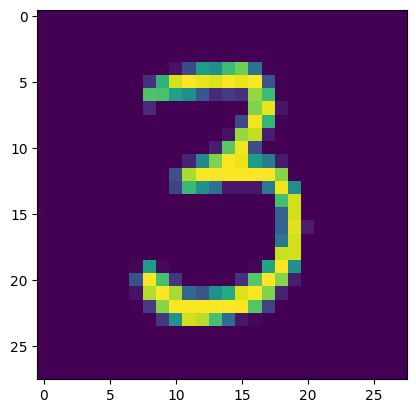

3


In [4]:
plt.imshow(X_train[50])
plt.show()

print(Y_train[50])

In [5]:
#Scaling the values
X_train = X_train/255
X_test = X_test/255

In [6]:
#Building the Neural Network
model = keras.Sequential([
                           keras.layers.Flatten(input_shape = (28,28)),
                           keras.layers.Dense(50,activation='relu'),
                           keras.layers.Dense(10,activation='sigmoid')

])

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])

In [8]:
model.fit(X_train,Y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8529 - loss: 0.5240
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9501 - loss: 0.1713
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9625 - loss: 0.1260
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 988us/step - accuracy: 0.9707 - loss: 0.1005
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9753 - loss: 0.0843
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9790 - loss: 0.0716
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9822 - loss: 0.0614
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9850 - loss: 0.0533
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9874 - loss: 0.0466
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9889 - loss: 0.0411


In [9]:
loss,accuracy = model.evaluate(X_test,Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step - accuracy: 0.9700 - loss: 0.1116


In [10]:
Y_pred = model.predict(X_test)
print(Y_pred[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 749us/step
[2.2786474e-03 7.6043079e-06 6.7259580e-02 9.4490463e-01 4.0440395e-06
 8.8572698e-03 3.1726972e-07 9.9995667e-01 1.6640378e-02 8.6480314e-01]


In [11]:
Y_pred_labels = [np.argmax(i) for i in Y_pred]

In [12]:
#Confusion Matrix 
conf_mat = confusion_matrix(Y_test,Y_pred_labels)
print(conf_mat)

tf.Tensor(
[[ 960    0    1    0    1    2    4    0    3    9]
 [   0 1116    4    4    0    1    3    0    7    0]
 [   6    0  994   10    1    0    4    4   12    1]
 [   0    0    5  989    0    1    1    4    5    5]
 [   0    0    1    1  962    1    6    3    1    7]
 [   1    0    0   17    3  857    3    1    7    3]
 [   4    2    2    1    5    7  935    0    2    0]
 [   1    1    9    4    5    0    0  991    2   15]
 [   1    1    2    6    4    2    3    2  950    3]
 [   1    2    1    6   16    4    0    3    5  971]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'predicted Labels')

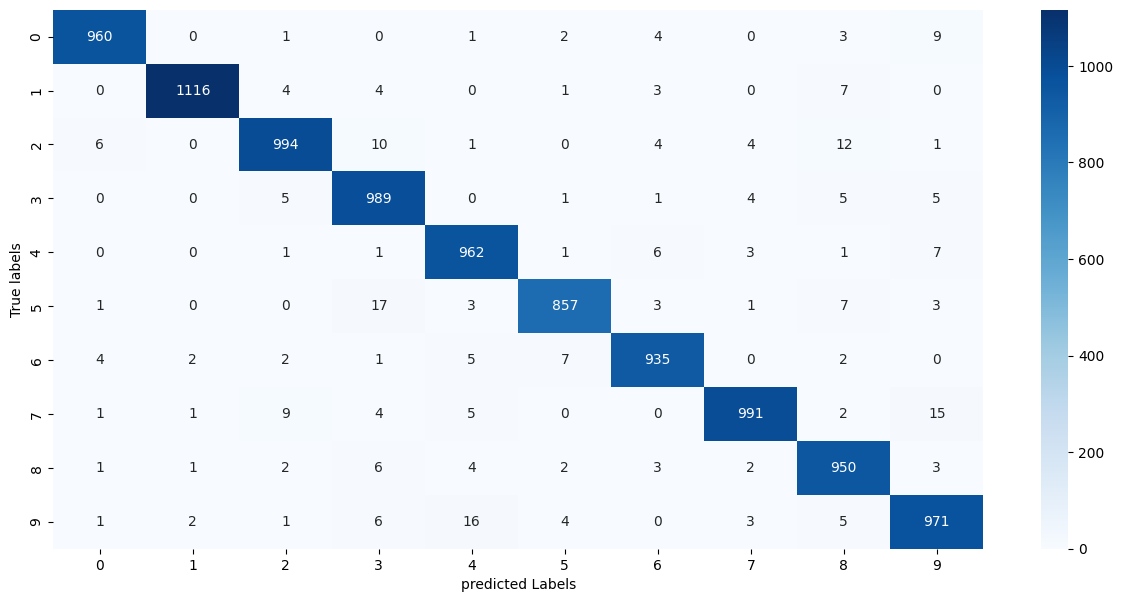

In [13]:
plt.figure(figsize = (15,7))
sns.heatmap(conf_mat , annot = True , fmt = 'd', cmap = 'Blues')
plt.ylabel('True labels')
plt.xlabel('predicted Labels')

In [20]:
input_image_paths = 'D:\\DeepLearning\\digitclassification\\MNIST_digit.png'

input_images = cv2.imread(input_image_paths)

In [21]:
type(input_images)

numpy.ndarray

In [ ]:
print(input_images)

In [25]:
input_images.shape

(318, 318, 3)

In [26]:
grayscale = cv2.cvtColor(input_images,cv2.COLOR_RGB2GRAY)

In [27]:
grayscale.shape

(318, 318)

In [28]:
input_image_resize = cv2.resize(grayscale,(28,28))

In [29]:
input_image_resize.shape

(28, 28)

In [30]:
input_image_resize = input_image_resize/255

In [31]:
image_reshaped = np.reshape(input_image_resize,[1,28,28])

In [32]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[[3.3093642e-08 2.0675157e-05 6.5852585e-04 1.0000000e+00 4.9629894e-16
  9.0194438e-03 9.7462036e-16 2.5753918e-04 2.4169775e-02 9.9806315e-01]]


In [33]:
input_pred_label = np.argmax(input_prediction)

In [34]:
print(input_pred_label)

3
